In [153]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/')

import numpy as np
import math
import matplotlib.pyplot as plt
import os
import time

from ghost.multisim import GhostSimulator

plt.rcParams['text.usetex'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RMSE: 55.883538739404955
PSNR: 13.18512562177754


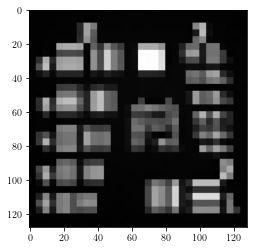

49.0885009765625 49.0885009765625


In [154]:
path = '../common/RC_780.png'
camera_res = (32, 32)
slm_res = (128, 128)
sim = GhostSimulator(path, slm_res, camera_res, 1)
cnt = sim.run_simulation()
rmse = sim.calc_rmse()
print('RMSE:', rmse)
psnr = sim.calc_psnr()
print('PSNR:', psnr)

plt.imshow(np.abs(sim.G2), cmap='gray')
plt.show()

print(np.average(sim.T), np.average(sim.G2))

In [140]:
print(np.average(sim.T), np.average(sim.G2))

49.0885009765625 0.19175195693969727


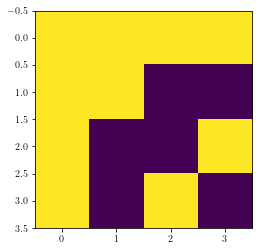

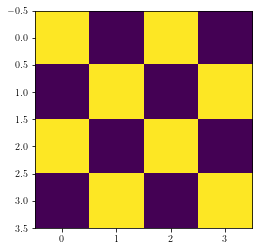

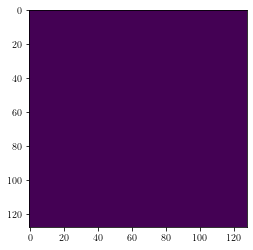

In [76]:
sim = GhostSimulator(path, slm_res, camera_res, 64*64*0.1)
h = sim.generate_hadamard(sim.shape_mac)

plt.imshow(h)
plt.show()

hp = sim.generate_partial_filter(15)
plt.imshow(hp)
plt.show()

s = sim.generate_filter(0)
plt.imshow(s)
plt.show()



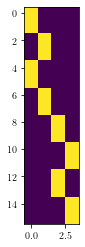

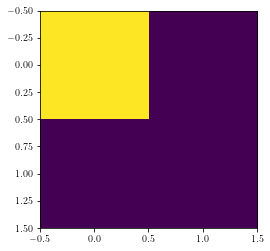

In [77]:
import numpy as np
from math import prod
import cv2

camera_res = (2, 2)
slm_res = (4, 4)

A = np.zeros((prod(slm_res), prod(camera_res)))

for i in range(slm_res[0]):
    for j in range(slm_res[1]):
        slm = np.zeros(slm_res)
        slm[i, j] = 1
        cam = cv2.resize(slm, camera_res, interpolation=cv2.INTER_AREA)
        cam = cam * prod(slm_res) / prod(camera_res)
        A[i*slm_res[1] + j, :] = cam.flatten()

plt.imshow(A)
plt.show()

plt.imshow(A[5].reshape(camera_res))
plt.show()